# EDA

In [2]:
import pandas as pd
import os
os.chdir("..")
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from codigo.utils_functions import *

Se leen los datos de enfermedad en el corazón:

In [7]:
df=read_dataset()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Los datos tienen 304 observaciones de pacientes y 14 columnas. Las 14 variables se refieren a las características de los pacientes.

In [8]:
df.shape

(303, 14)

## Variables categóricas

Se convierten las variables de númericas a categóricas:

In [21]:
convert_object(df, cat_vars).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Se grafican las variables categóricas contra el target.Las variables categóricas son:

In [53]:
cat_vars

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

**cp=Tipo de dolor de pecho:**
+ 0: typical angina 
+ 1: atypical angina
+ 2: non-anginal pain
+ 3: asymptomatic 

<AxesSubplot:xlabel='target'>

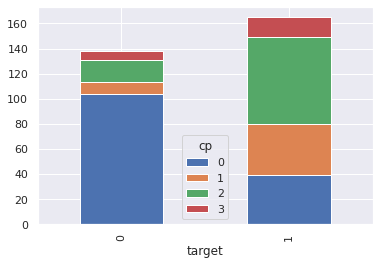

In [50]:
df1 = df.groupby(["target","cp"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'cp' , values = 'counts').plot(kind = 'bar', stacked = True)

**fbs= Nivel de azúcar en sangre > 120 mg/dl**
+ 1 = verdadero
+ 0 = falso 

<AxesSubplot:xlabel='target'>

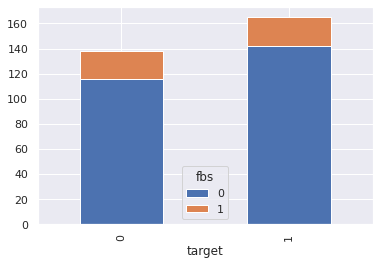

In [51]:
df1 = df.groupby(["target","fbs"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'fbs' , values = 'counts').plot(kind = 'bar', stacked = True)

**restecg: Resultados del electrocardiograma en reposo**
+ 0: normal
+ 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
+ 2: showing probable or definite left ventricular hypertrophy by Estes' crite

<AxesSubplot:xlabel='target'>

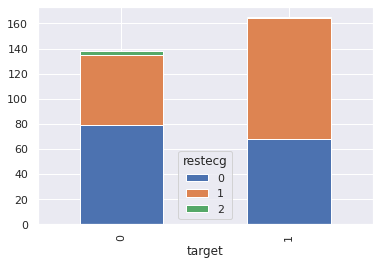

In [52]:
df1 = df.groupby(["target","restecg"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'restecg' , values = 'counts').plot(kind = 'bar', stacked = True)

**exang= Angina inducida por ejercicio**
+ 1 = sí
+ 0 = no

<AxesSubplot:xlabel='target'>

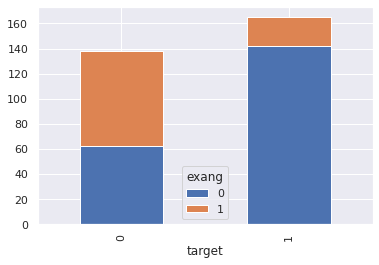

In [54]:
df1 = df.groupby(["target","exang"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'exang' , values = 'counts').plot(kind = 'bar', stacked = True)

**slope=Pendiente del segmento ST de ejercicio pico**
+ 0: upsloping
+ 1: flat
+ 2: downsloping 

<AxesSubplot:xlabel='target'>

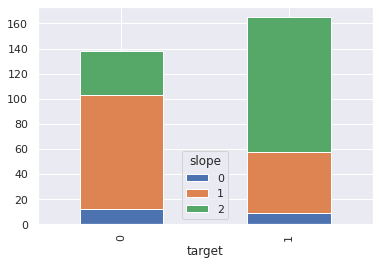

In [55]:
df1 = df.groupby(["target","slope"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'slope' , values = 'counts').plot(kind = 'bar', stacked = True)

**ca=Número de vasos principales (0-3) coloreados por la flouración**

<AxesSubplot:xlabel='target'>

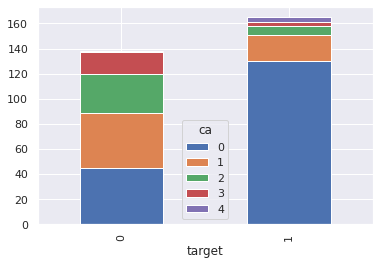

In [56]:
df1 = df.groupby(["target","ca"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'ca' , values = 'counts').plot(kind = 'bar', stacked = True)

**thal**
+ 0: NULL (dropped from the dataset previously)
+ 1: fixed defect (no blood flow in some part of the heart)
+ 2: normal blood flow
+ 3: reversible defect (a blood flow is observed but it is not normal)

<AxesSubplot:xlabel='target'>

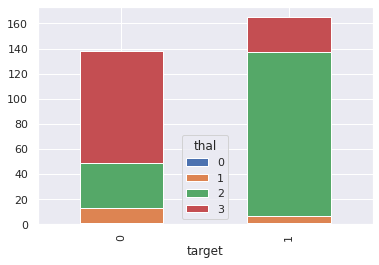

In [57]:
df1 = df.groupby(["target","thal"]).size().reset_index(name='counts')
df1.pivot_table(index = 'target', columns = 'thal' , values = 'counts').plot(kind = 'bar', stacked = True)

## Variables Numéricas

Las variables numéricas son:

In [64]:
num_vars

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Distribución de la edad del paciente por sexo:**

/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

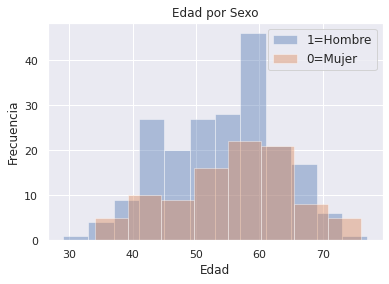

In [22]:
df1 = df[df.sex == 1]
sns.distplot(df1['age'],  kde=False, label='1=Hombre')
df1 = df[df.sex == 0]
sns.distplot(df1['age'],  kde=False, label='0=Mujer')
plt.legend(prop={'size': 12})
plt.title('Edad por Sexo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

**Distribución de la presión arterial en reposo (en mm Hg al ingreso en el hospital) (trestbps):**

/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

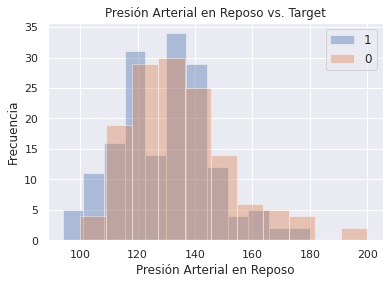

In [66]:
df1 = df[df.target == 1]
sns.distplot(df1['trestbps'],  kde=False, label='1')
df1 = df[df.target == 0]
sns.distplot(df1['trestbps'],  kde=False, label='0')
plt.legend(prop={'size': 12})
plt.title('Presión Arterial en Reposo vs. Target')
plt.xlabel('Presión Arterial en Reposo')
plt.ylabel('Frecuencia')

**Distribución del colesterol sérico en mg / dl (chol):**

/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

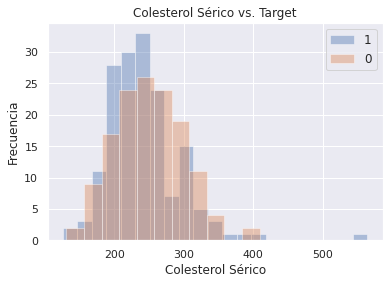

In [71]:
df1 = df[df.target == 1]
sns.distplot(df1['chol'],  kde=False, label='1')
df1 = df[df.target == 0]
sns.distplot(df1['chol'],  kde=False, label='0')
plt.legend(prop={'size': 12})
plt.title('Colesterol Sérico vs. Target')
plt.xlabel('Colesterol Sérico')
plt.ylabel('Frecuencia')

**Distribución de la frecuencia cardíaca máxima alcanzada (thalach):**

/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

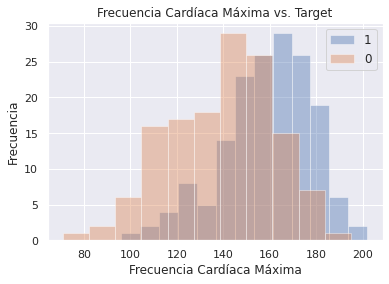

In [72]:
df1 = df[df.target == 1]
sns.distplot(df1['thalach'],  kde=False, label='1')
df1 = df[df.target == 0]
sns.distplot(df1['thalach'],  kde=False, label='0')
plt.legend(prop={'size': 12})
plt.title('Frecuencia Cardíaca Máxima vs. Target')
plt.xlabel('Frecuencia Cardíaca Máxima')
plt.ylabel('Frecuencia')

**Distribución de la depresión del ST inducida por el ejercicio en relación al reposo (oldpeak):**

/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mariana/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia')

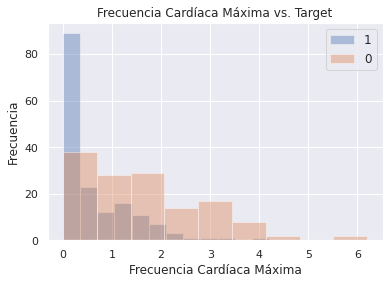

In [75]:
df1 = df[df.target == 1]
sns.distplot(df1['oldpeak'],  kde=False, label='1')
df1 = df[df.target == 0]
sns.distplot(df1['oldpeak'],  kde=False, label='0')
plt.legend(prop={'size': 12})
plt.title('Frecuencia Cardíaca Máxima vs. Target')
plt.xlabel('Frecuencia Cardíaca Máxima')
plt.ylabel('Frecuencia')